Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


DATA COLLECTION: 'nonvoters_data.csv' comes from fivethirtyeight.com data page. It is read by pandas to produce a DataFrame object.

In [2]:
voter_data = pd.read_csv("nonvoters_original_data.csv")

In [3]:
voter_data = voter_data.astype('category')

In [4]:
voter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, RespId to voter_category
dtypes: category(119)
memory usage: 966.5 KB


In [5]:
voter_data.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [6]:
missing = pd.concat([voter_data.isnull().sum(),voter_data.isnull().mean()],axis=1)
missing.columns = ['Total null', '%']
print(missing.sort_values(by ='Total null', ascending=False))


                Total null         %
Q22                   5350  0.916724
Q29_10                4494  0.770048
Q29_2                 4494  0.770048
Q29_3                 4494  0.770048
Q29_4                 4494  0.770048
...                    ...       ...
Q8_8                     0  0.000000
Q8_7                     0  0.000000
Q8_6                     0  0.000000
Q8_5                     0  0.000000
voter_category           0  0.000000

[119 rows x 2 columns]


The output below shows the questions that have any null entries. Only these questions have null entries: 22, 28, 29, 31, 32, 33

In [7]:
l = len(missing['Total null'])
for i in range(l):
    if missing.iloc[i,0] > 0:
        print(missing.index[i], missing.iloc[i,0])


Q22 5350
Q28_1 534
Q28_2 534
Q28_3 534
Q28_4 534
Q28_5 534
Q28_6 534
Q28_7 534
Q28_8 534
Q29_1 4494
Q29_2 4494
Q29_3 4494
Q29_4 4494
Q29_5 4494
Q29_6 4494
Q29_7 4494
Q29_8 4494
Q29_9 4494
Q29_10 4494
Q31 4244
Q32 3834
Q33 3594


Q22 -- only those who were not currently registered answered the question.  
Q28 (all) -- only those who vote (self-identified from Q26) answered this question. 534 were not asked this question.  
Q29 (all) -- those who "always" voted were **excluded** from this question. 4494 were not asked this question. **There seems to be a unexpectedly high number of respondents who say they "always/almost always" vote (see Q26).**  
Q31 -- Only asked of Republicans.  
Q32 -- Only asked of Democrats.  
Q33 -- Only asked of independents/ no party preference.  
**There appears to be a reasonable split among Republicans, Democrats, independents.**  

In [11]:
voter_data['Q1'].describe()


count     5836
unique       1
top          1
freq      5836
Name: Q1, dtype: int64

Q1: Everyone must answer "Yes" they are a U.S. citizen so this question can be dropped.

In [12]:
voter_data = voter_data.drop(columns='Q1')

In [13]:
voter_data.head(2)

,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,2,4,1,4,2,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,2,2,3,1,1,2,1,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always


In [15]:
variables = voter_data.drop(columns=['RespId','weight','ppage'])

In [14]:
def print_figure(df,col_label):
    ''' plots a bar chart with the counts of responses for one question 
    specified by col_label for voters who "always" vote and voters who 
    "rarely/never" vote. '''
    # filter dataframe for 'always' voters and count the 
    # responses for each question.
    always_count = df[df['voter_category']=='always'][col_label].value_counts()
    
    # Create lists of: (1) the counts from above and (2) the index labels
    # (the choices 1, 2, 3 etc.)
    # for creating new dataframe later
    
    counts_always = []
    sum_list = 0
    for i in range(len(always_count)):
        counts_always.append(always_count.iloc[i])
        sum_list += always_count.iloc[i]
    labels_a = list(always_count.index)

    for i,v in enumerate(counts_always):
        counts_always[i] = v/sum_list
    
    # perform the same operations as above but for "rarely/never" voters.

    never_count = df[df['voter_category']=='rarely/never'][col_label].value_counts()
    counts_never = []
    sum_list = 0
    for i in range(len(never_count)):
        counts_never.append(never_count.iloc[i])
        sum_list += never_count.iloc[i]
    labels_n = list(never_count.index)
    
    for i,v in enumerate(counts_never):
        counts_never[i] = v/sum_list
        
    # create new dataframes from counts information and joins them
    always_df = pd.DataFrame(counts_always, index=labels_a, columns=['A'])
    never_df = pd.DataFrame(counts_never, index=labels_n, columns=['N'])
    complete_df = always_df.join(never_df)
    complete_df.sort_index(inplace=True)

    # retrieve index labels and counts again as lists for plotting.
    labels = list(complete_df.index)
    always_counts = list(complete_df['A'])
    never_counts = list(complete_df['N'])


    # plot bar charts for 'Always' and 'Never'
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - width/2, always_counts, width, label='Always')
    rects2 = ax.bar(x + width/2, never_counts, width, label='Never')
    

    # Add title and label axes
    ax.set_ylabel('Count')
    ax.set_title(col_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    return plt.show()

In [16]:
variables.columns

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10',
       ...
       'Q29_10', 'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender',
       'income_cat', 'voter_category'],
      dtype='object', length=115)

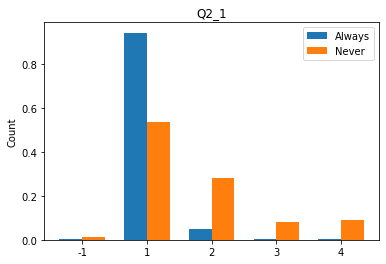

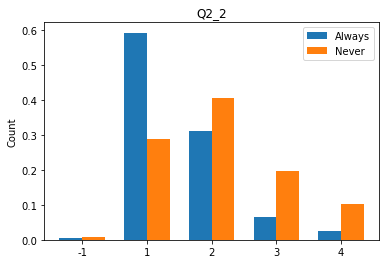

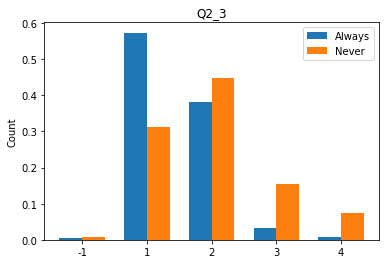

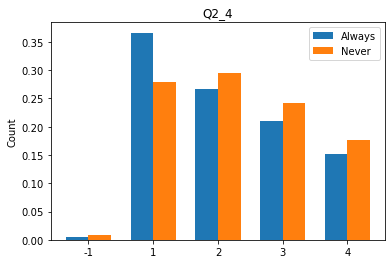

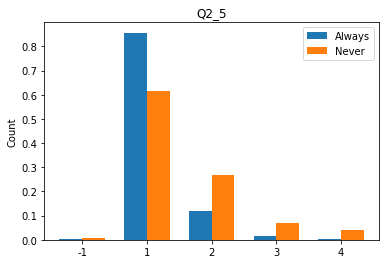

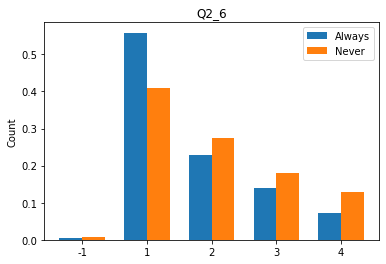

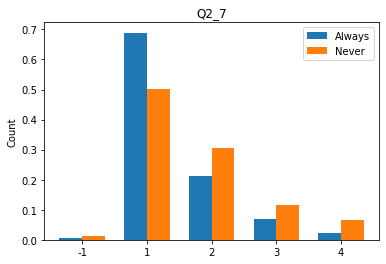

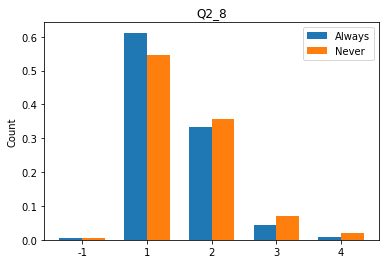

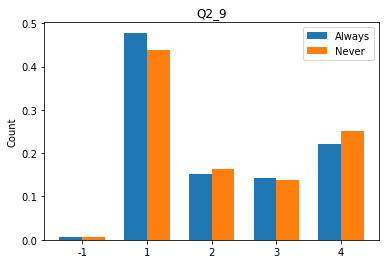

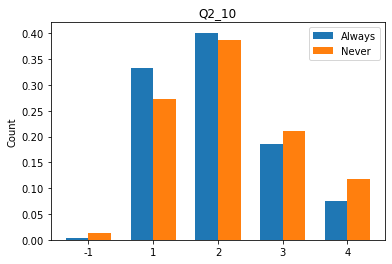

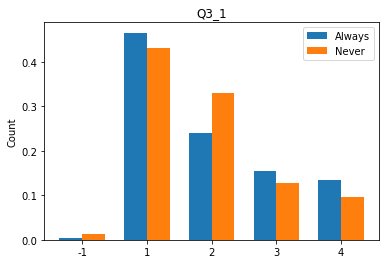

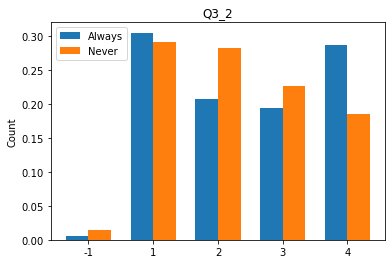

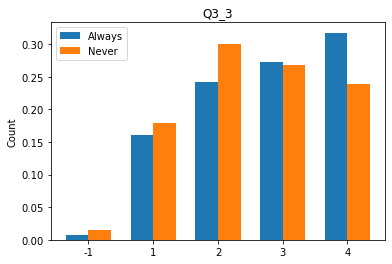

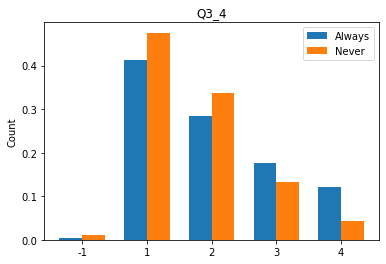

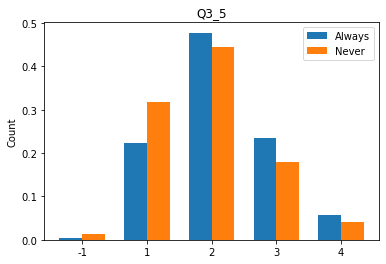

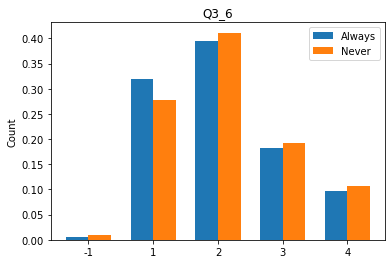

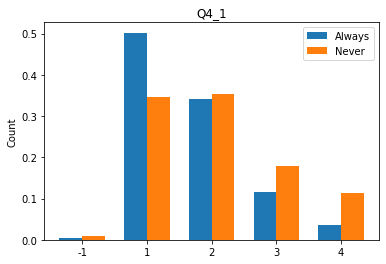

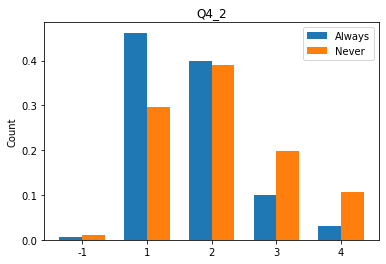

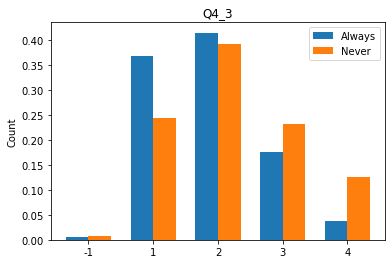

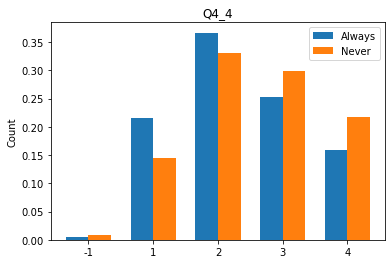

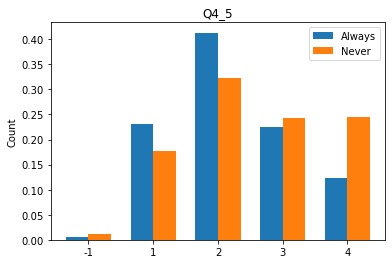

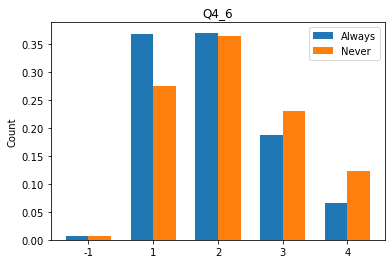

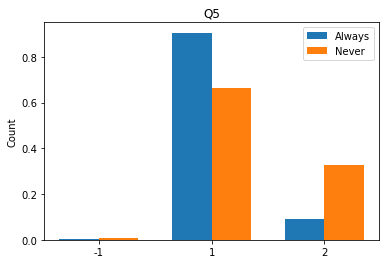

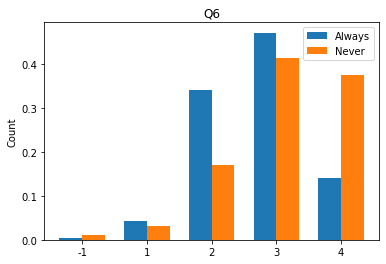

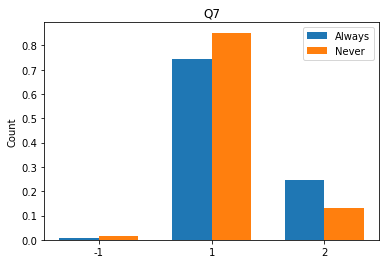

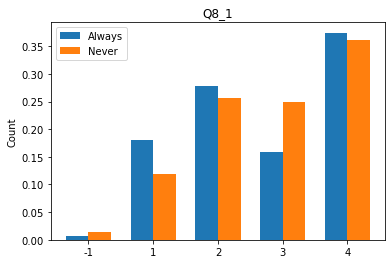

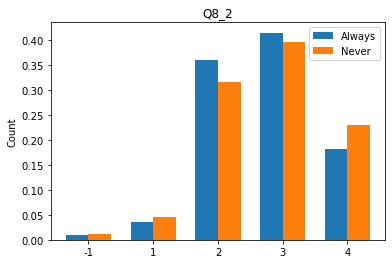

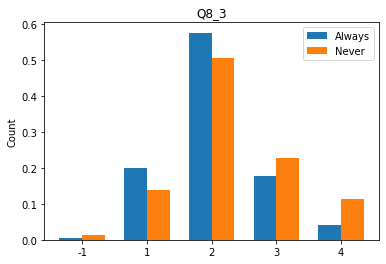

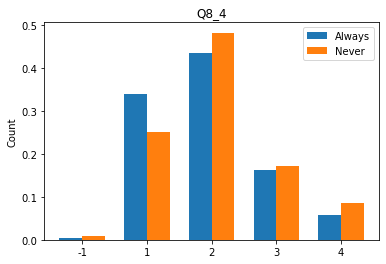

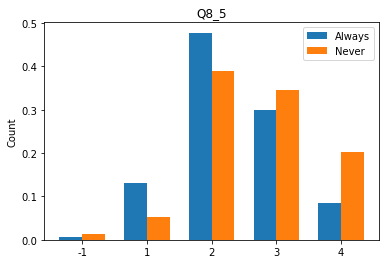

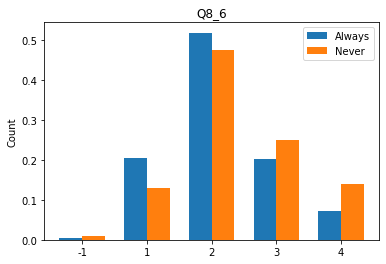

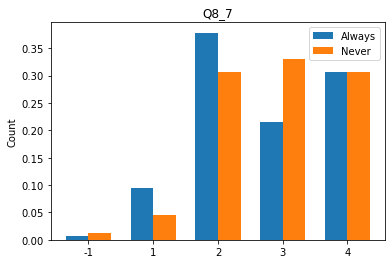

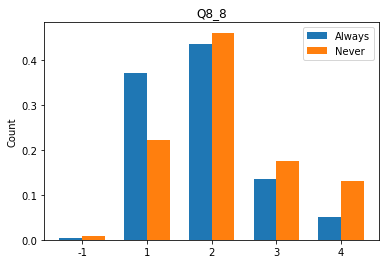

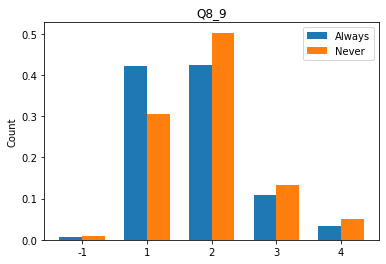

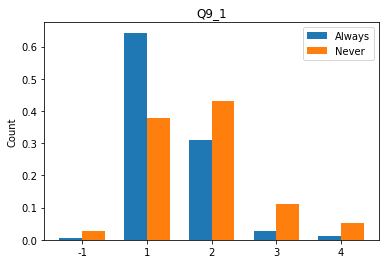

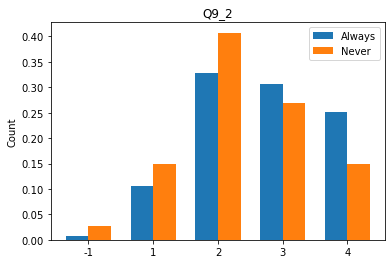

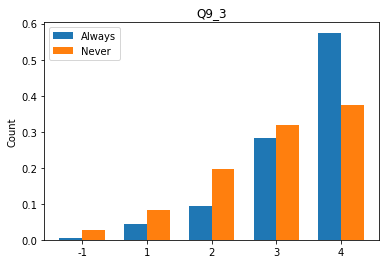

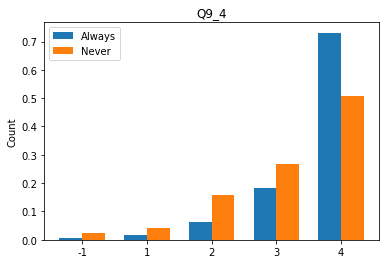

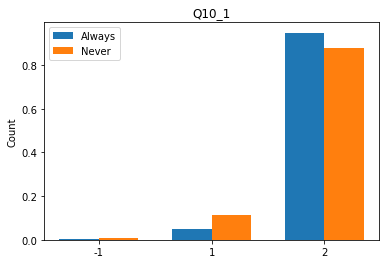

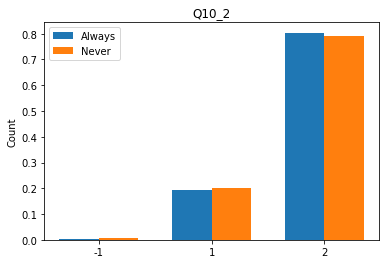

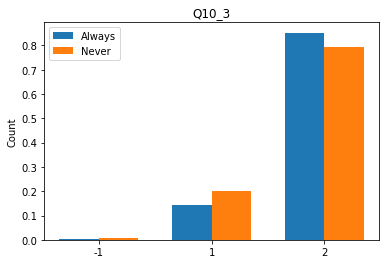

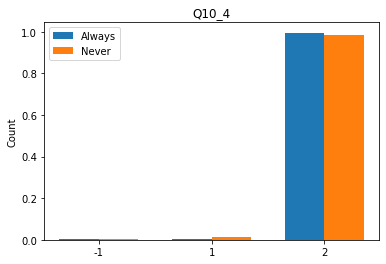

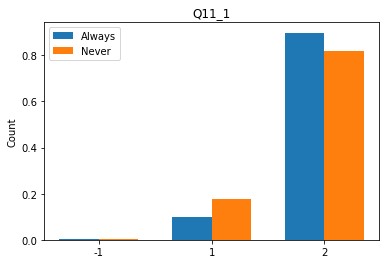

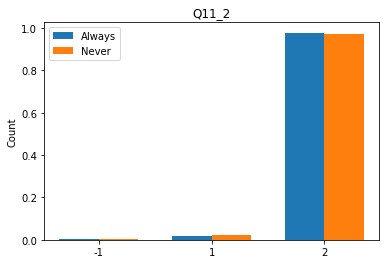

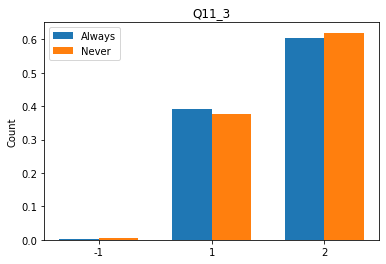

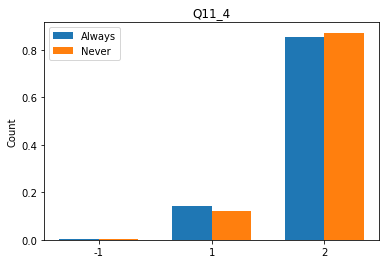

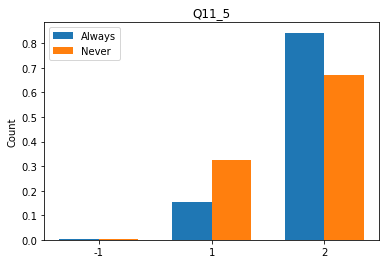

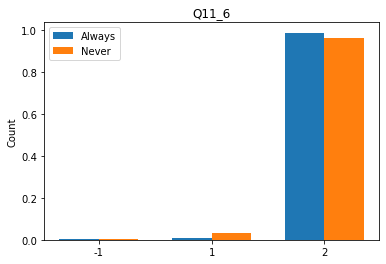

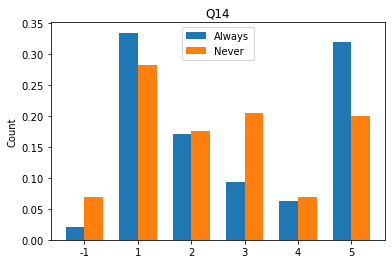

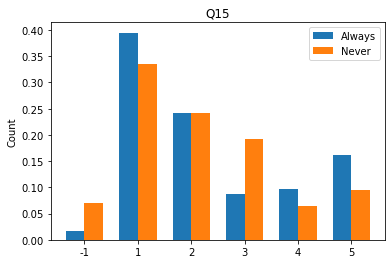

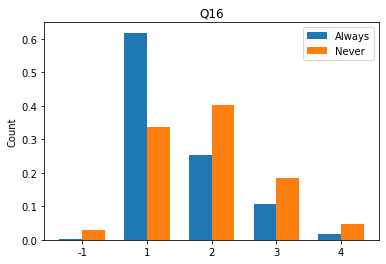

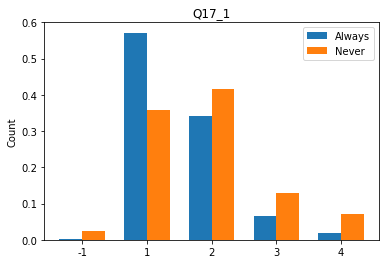

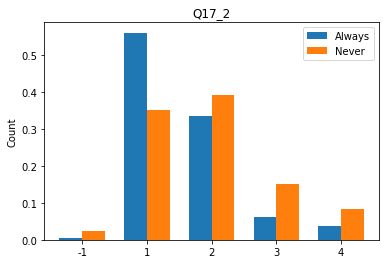

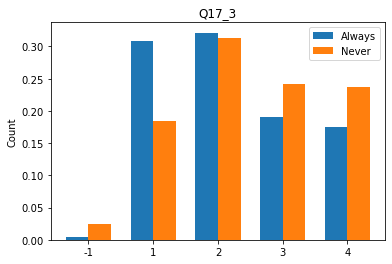

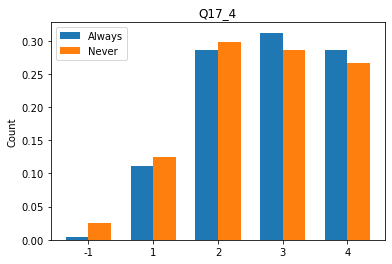

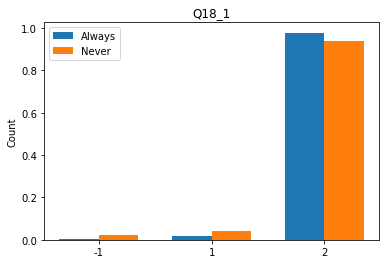

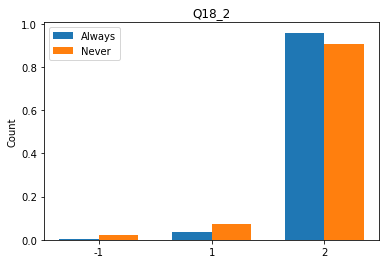

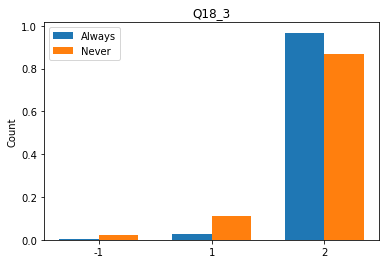

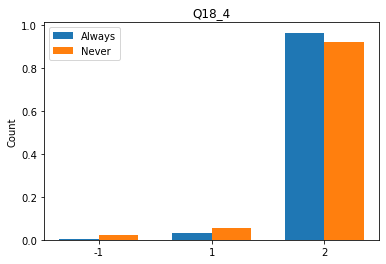

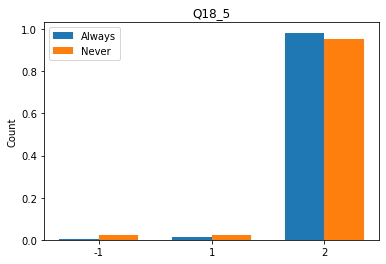

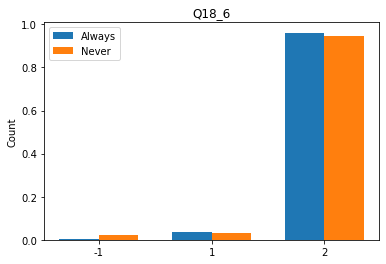

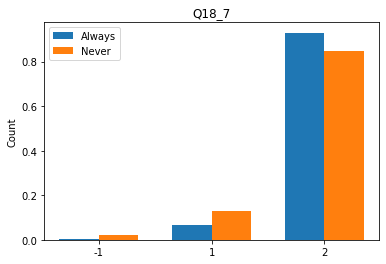

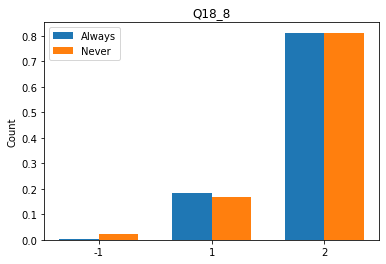

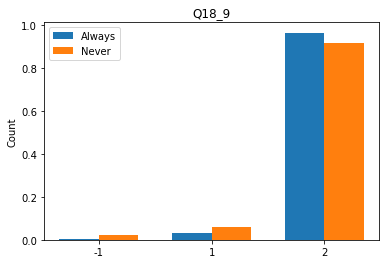

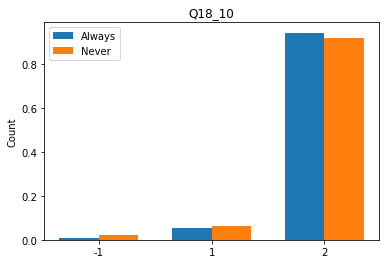

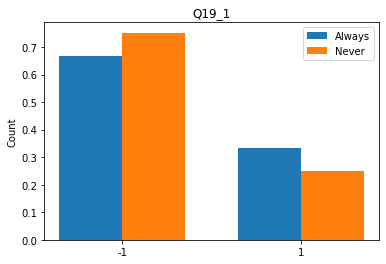

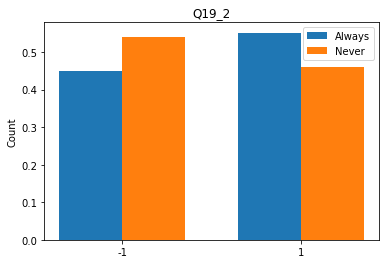

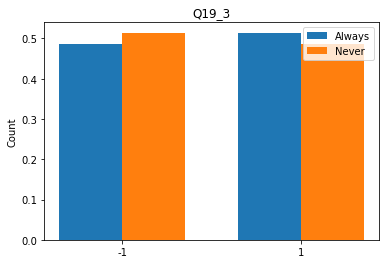

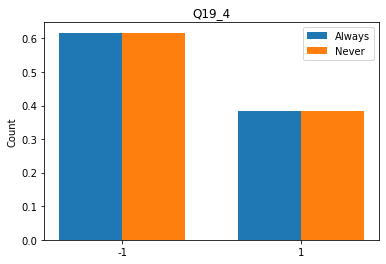

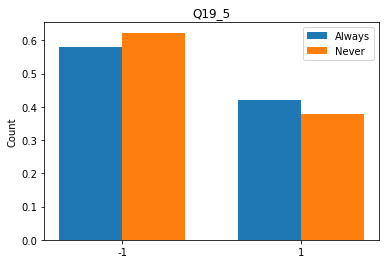

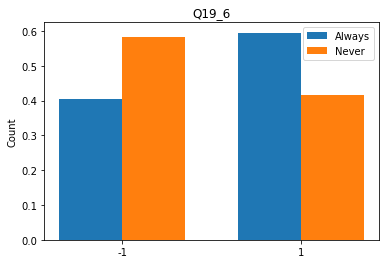

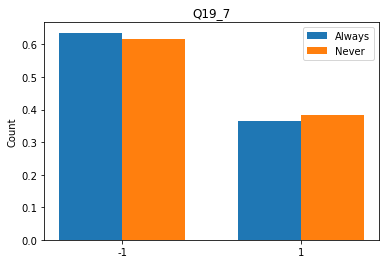

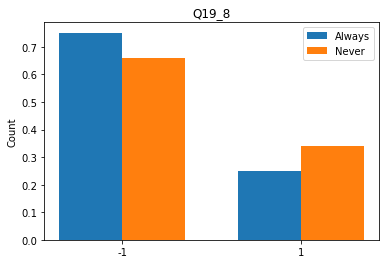

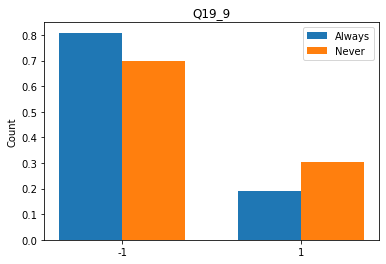

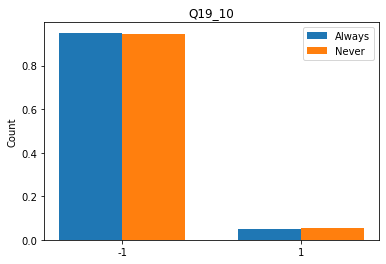

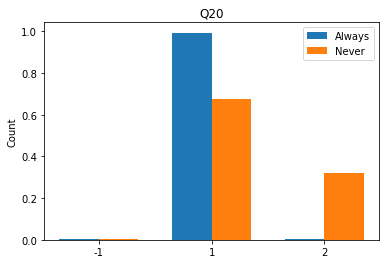

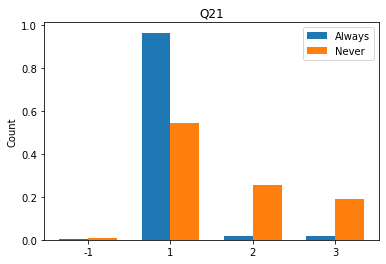

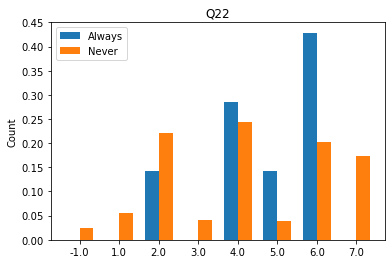

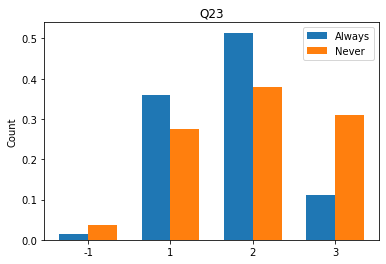

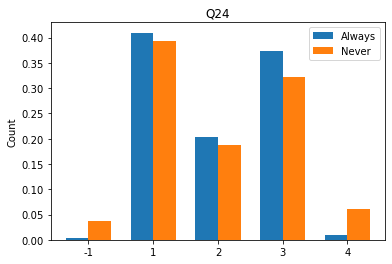

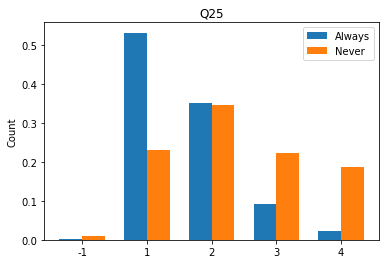

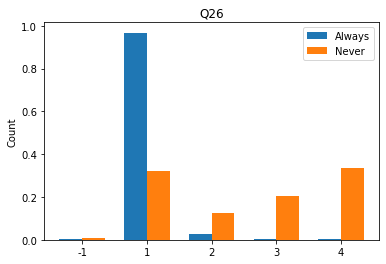

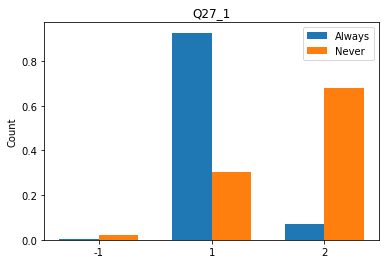

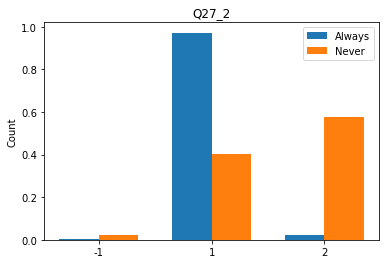

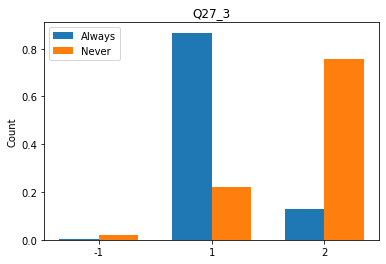

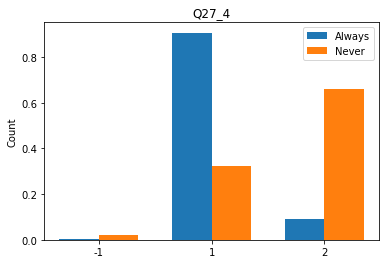

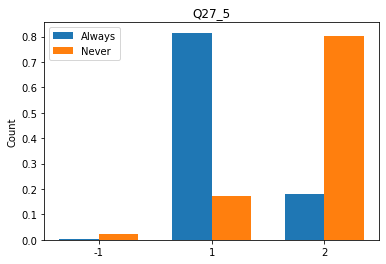

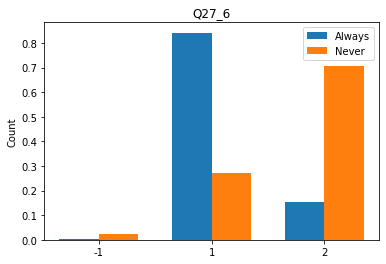

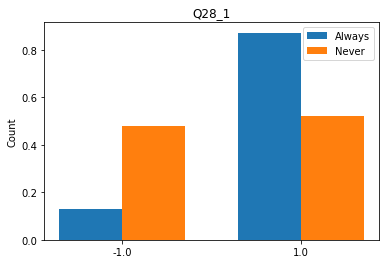

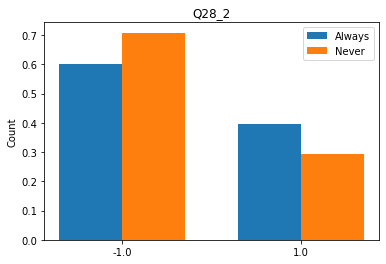

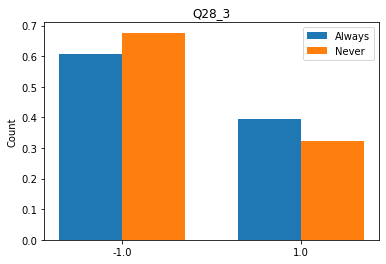

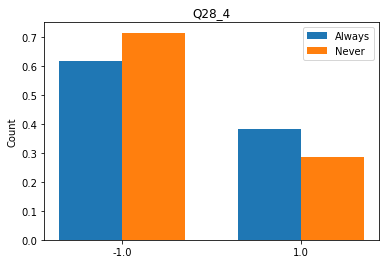

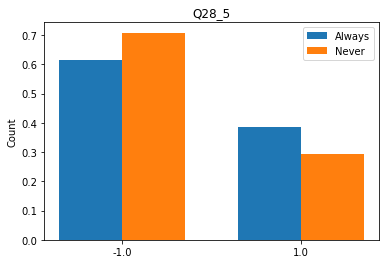

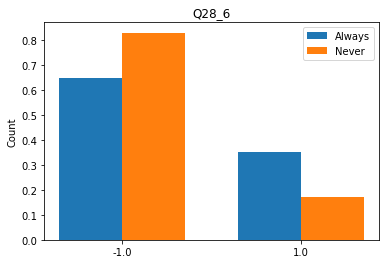

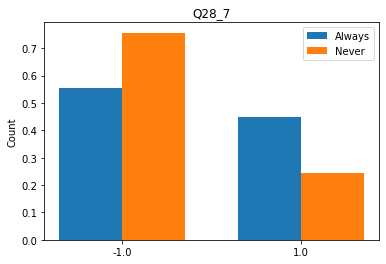

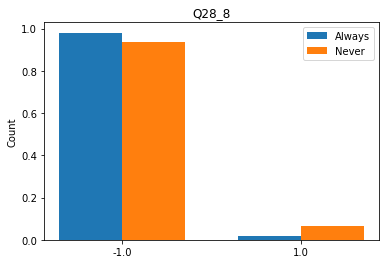

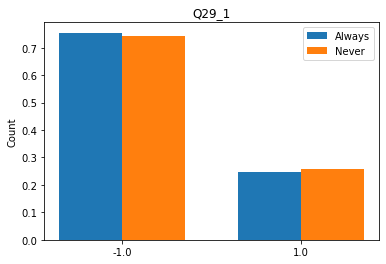

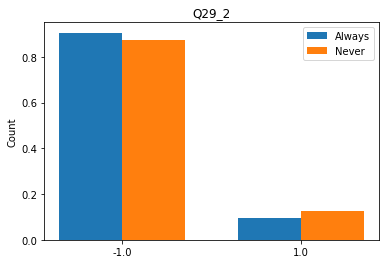

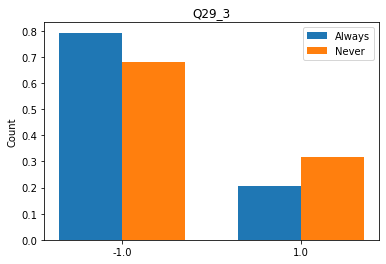

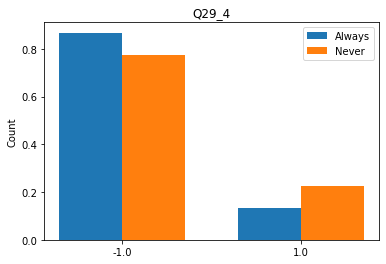

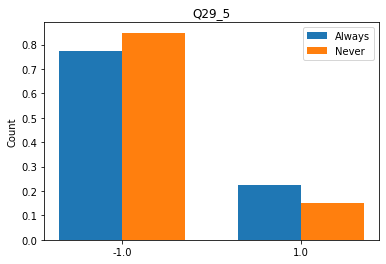

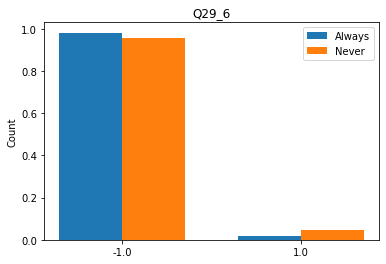

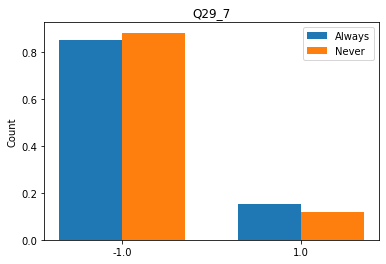

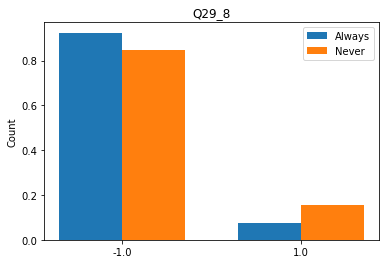

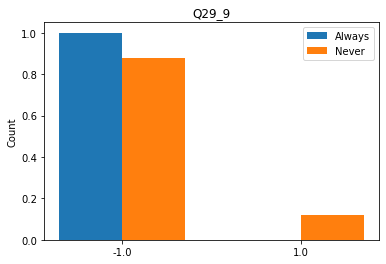

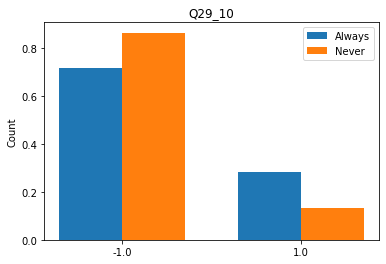

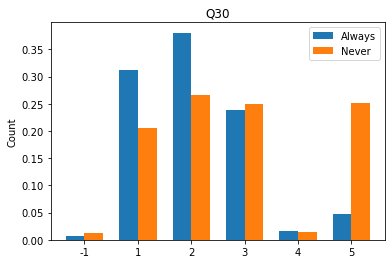

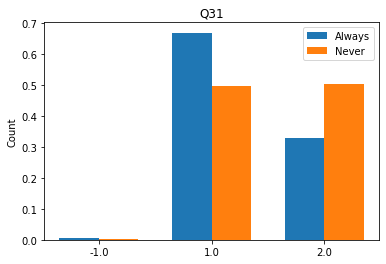

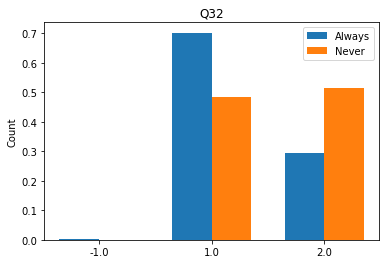

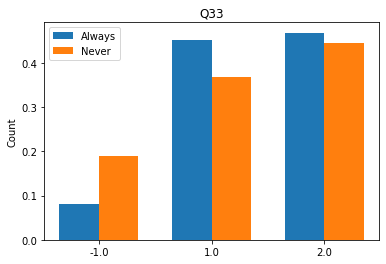

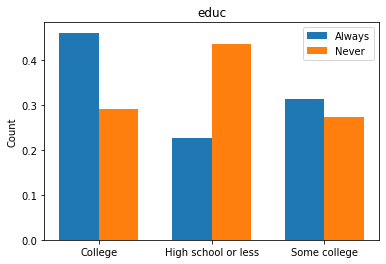

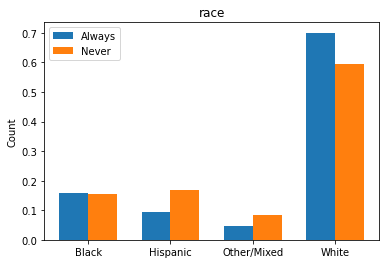

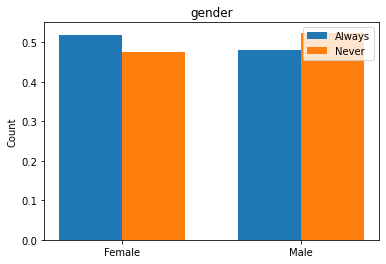

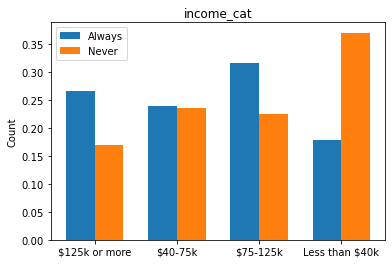

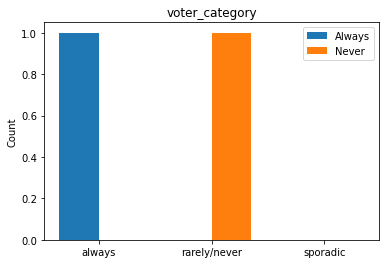

In [17]:
for i, col in enumerate(variables.columns):
    print_figure(variables, col)

Based on the figures above, some of these questions are clearly not distinguishing "always" and "never" voters. These can be eliminated from further analysis.
2_9 - believing in God.  
3_6 - people need to change how to talk  
10_2 - have a chronic illness  
10_3 -- have been unemployed  
10_4 -- have been evicted  
11_2 -- tested positive for Covid-19  
11_3 -- friend/family test positive  
11_4 -- friend/family die Covid-19  
11_6 -- quit job to care for someone  
17_4 -- electronic voting  
18_1 -- experienced being told wrong ID  
18_2 -- could not find polling station  
18_4 -- physically unable to access poll  
18_5 -- could not obtain assistance with ballot  
18_6 -- had to cast provisional ballot  
18_8 -- waited in line for more than an hour  
18_10 -- did not receive mail-in/provisional on time  
19_3 -- Election Day national holiday  
19_4 -- automatic registration  
19_5 -- automatically receiving ballot  
19_7 -- same-day registration  
19_10 -- other  
29_1 -- didn't like any candidates  
29_2 -- where I live, doesn't matter  
29_7 -- issues important to me personally  



In [18]:
drops = ['2_9', '3_6', '10_2', '10_3', '10_4', '11_2', '11_3', '11_4', 
         '11_6', '17_4', '18_1', '18_2', '18_4', '18_5', '18_6', '18_8',
         '18_10', '19_3', '19_4', '19_5', '19_7', '19_10', '29_1', 
         '29_2', '29_7'] 
drop = []
for q in drops:
    drop.append('Q' + q)
print(drop)

['Q2_9', 'Q3_6', 'Q10_2', 'Q10_3', 'Q10_4', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_6', 'Q17_4', 'Q18_1', 'Q18_2', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_8', 'Q18_10', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_7', 'Q19_10', 'Q29_1', 'Q29_2', 'Q29_7']


In [19]:
data_drops = voter_data.drop(columns=drop)

In [20]:
#  same function as above except always voters and never voters are 
#  split into two parties.

def print_figure_by_party(df,col_label):
    ''' plots a bar chart with the counts of responses for one question 
    specified by col_label for voters who "always" vote and voters who 
    "rarely/never" vote. '''
    # filter dataframe for 'always' voters and count the 
    # responses for each question.
    
    # republicans are defined as Q30 1 - Republican or Q33 1 - leans Republican
    republicans_df = df[(df['Q30']==1) | (df['Q33']==1)]
    always_republicans = republicans_df[republicans_df['voter_category']=='always'][col_label].value_counts()
    never_republicans = republicans_df[republicans_df['voter_category']=='rarely/never'][col_label].value_counts()

    # democrats are defined as Q30 2 - Democrat or Q33 2 - leans Democrat
    democrats_df = df[(df['Q30']==2) | (df['Q33']==2)]
    always_democrats = democrats_df[democrats_df['voter_category']=='always'][col_label].value_counts()
    never_democrats = democrats_df[democrats_df['voter_category']=='rarely/never'][col_label].value_counts()
    
    # Create lists of: (1) the counts from above and (2) the index labels
    # (the choices 1, 2, 3 etc.)
    # for creating new dataframe later
        
    def make_lists(df):
        counts = []
        sum_list = 0
        for i in range(len(df)):
            counts.append(df.iloc[i])
            sum_list += df.iloc[i]
        labels = list(df.index)

        for i,v in enumerate(counts):
            counts[i] = v/sum_list
        return(counts, labels)
    
    lists_ar = make_lists(always_republicans)
    lists_nr = make_lists(never_republicans)
    lists_ad = make_lists(always_democrats)
    lists_nd = make_lists(never_democrats)
            
    # create new dataframes from counts information and joins them
    ar_df = pd.DataFrame(lists_ar[0], index=lists_ar[1], columns=['AR'])
    nr_df = pd.DataFrame(lists_nr[0], index=lists_nr[1], columns=['NR'])
    ad_df = pd.DataFrame(lists_ad[0], index=lists_ad[1], columns=['AD'])
    nd_df = pd.DataFrame(lists_nd[0], index=lists_nd[1], columns=['ND'])

    complete_df = ar_df.join(nr_df).join(ad_df).join(nd_df)
    complete_df.sort_index(inplace=True)
    
    
    # retrieve index labels and counts again as lists for plotting.
    labels = list(complete_df.index)
    always_R_counts = list(complete_df['AR'])
    never_R_counts = list(complete_df['NR'])
    always_D_counts = list(complete_df['AD'])
    never_D_counts = list(complete_df['ND'])


    x = np.arange(len(labels))  # the label locations
    width = 0.10  # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - .2, always_R_counts, width, label='AR')
    rects2 = ax.bar(x - .1, never_R_counts, width, label='NR')
    rects3 = ax.bar(x + .1, always_D_counts, width, label='AD')
    rects4 = ax.bar(x + .2, never_D_counts, width, label='ND')



    # Add title and label axes
    ax.set_ylabel('Count')
    ax.set_title(col_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    return plt.show()

In [21]:
variables.shape

(5836, 115)

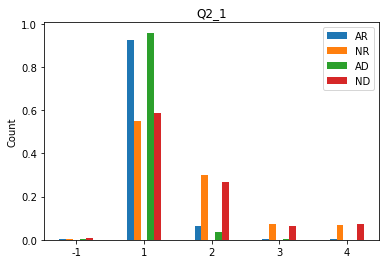

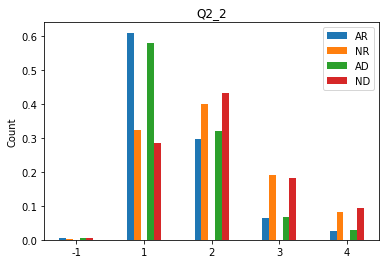

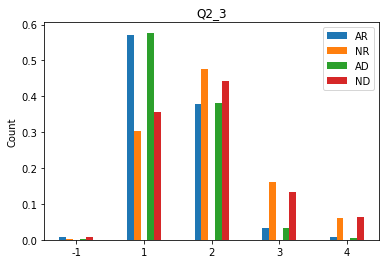

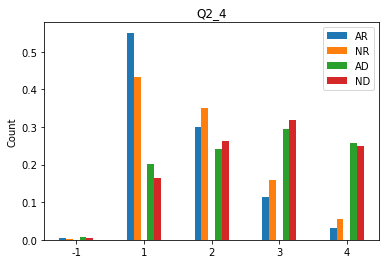

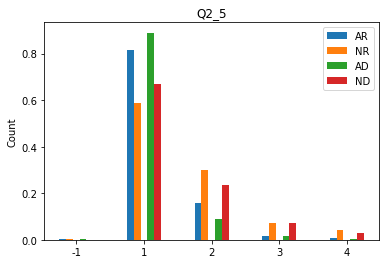

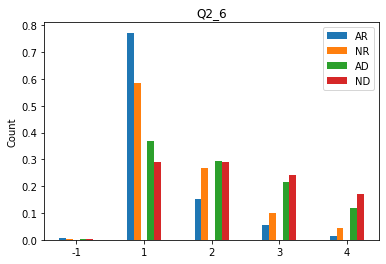

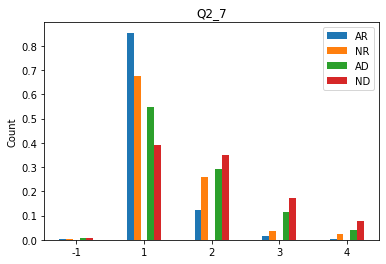

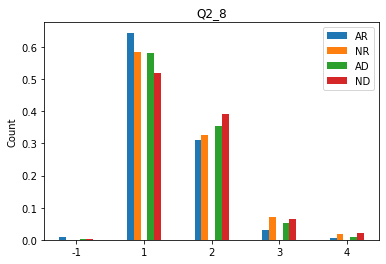

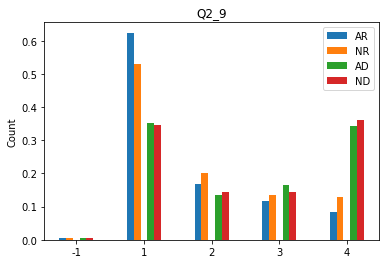

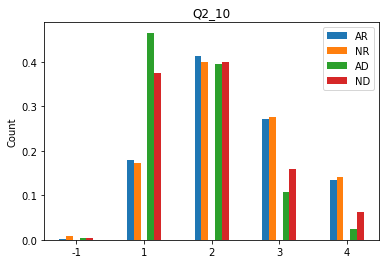

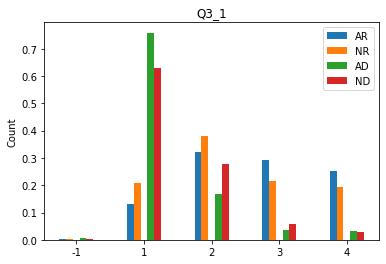

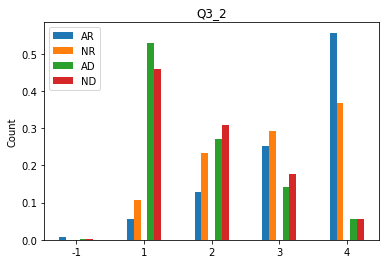

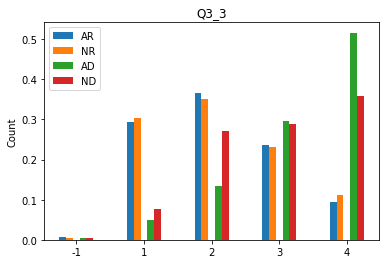

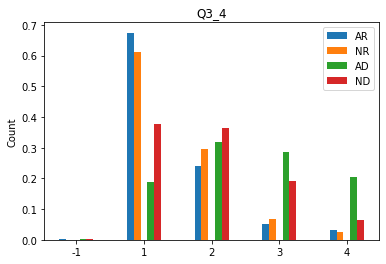

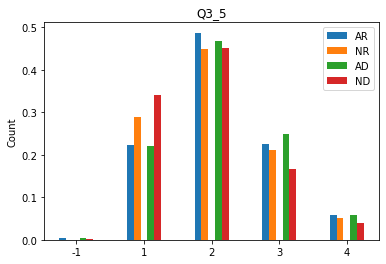

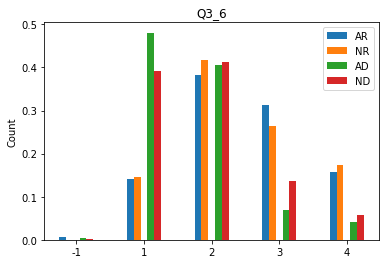

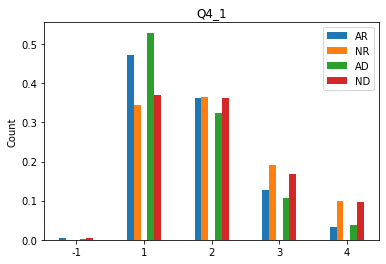

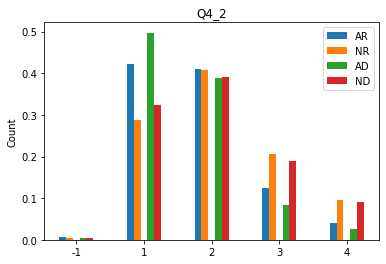

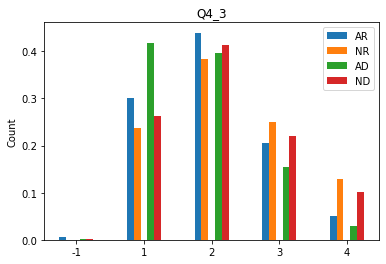

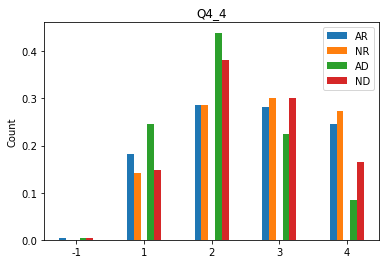

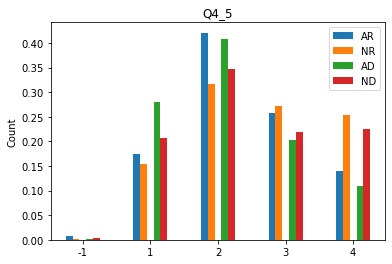

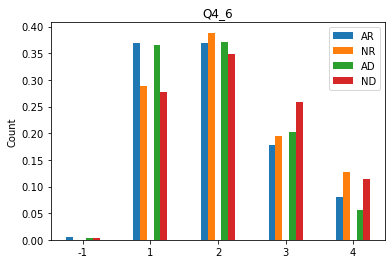

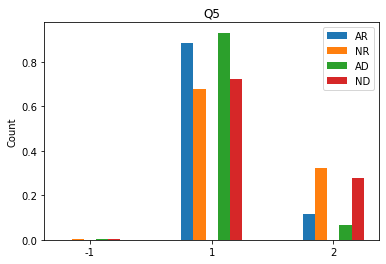

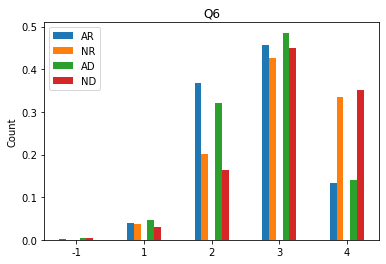

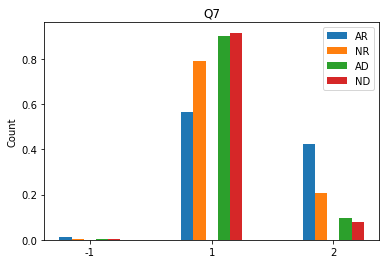

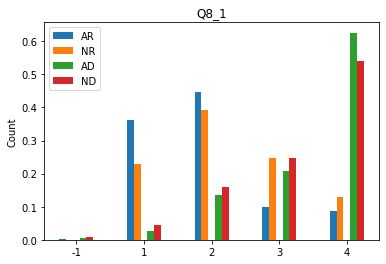

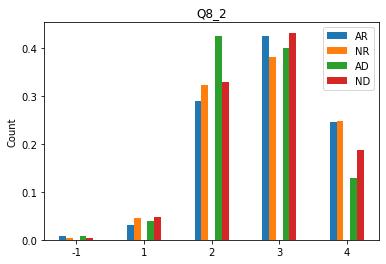

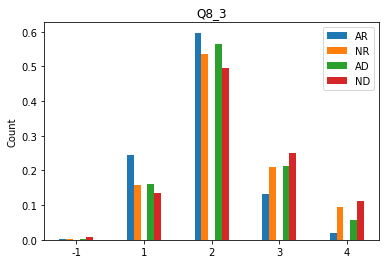

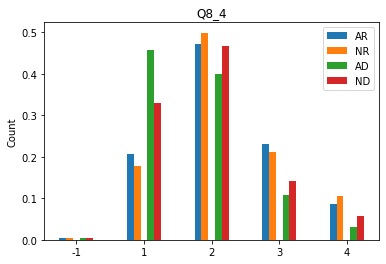

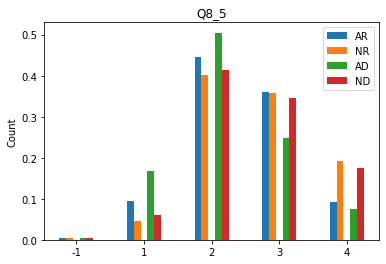

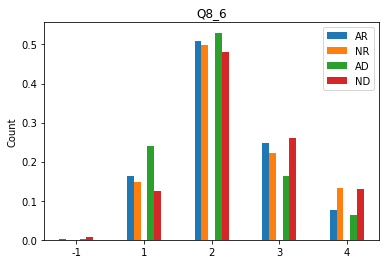

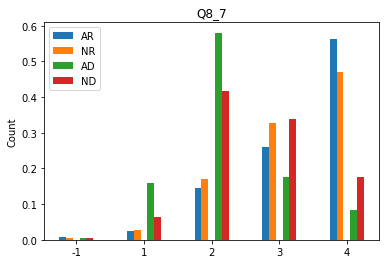

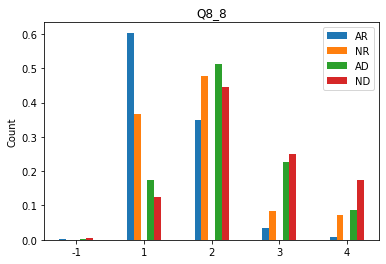

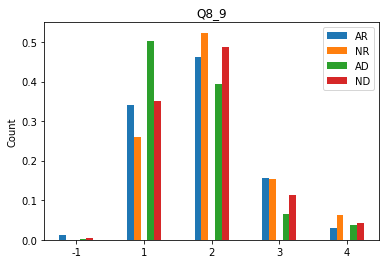

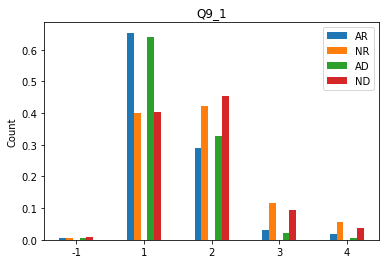

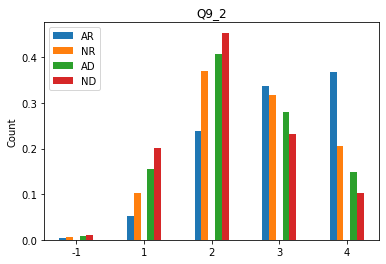

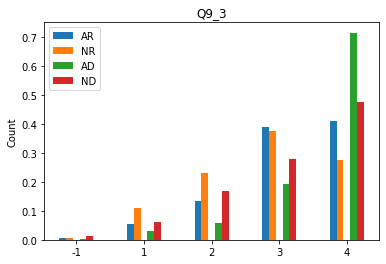

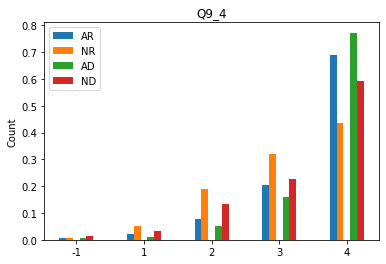

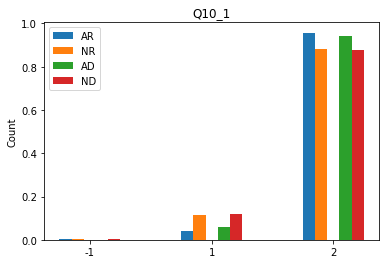

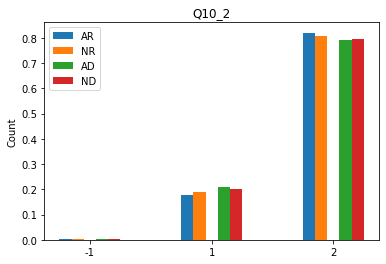

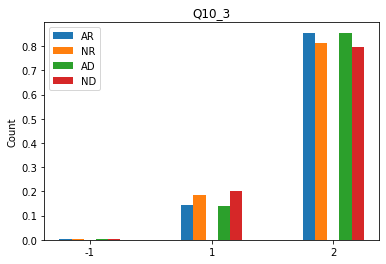

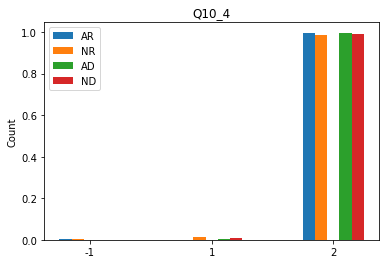

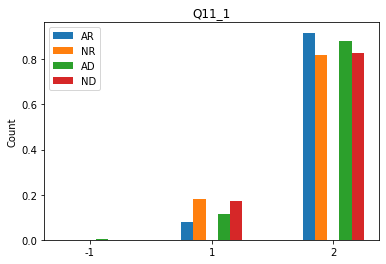

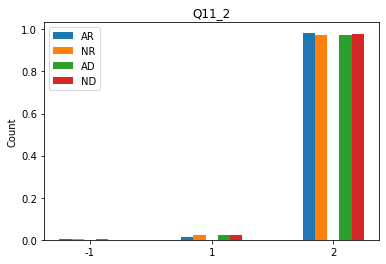

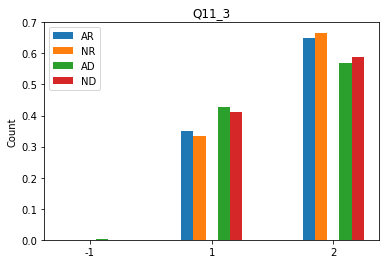

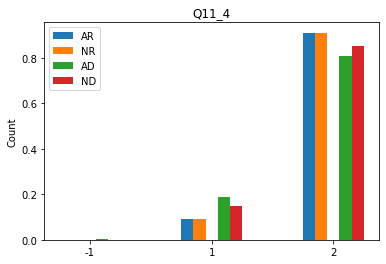

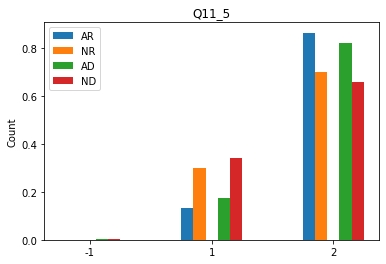

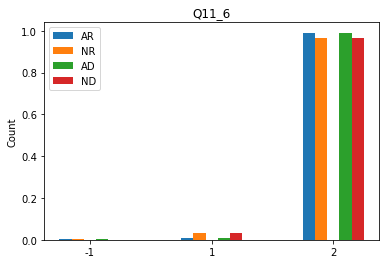

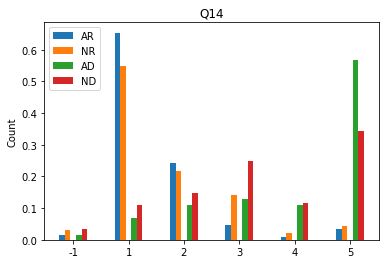

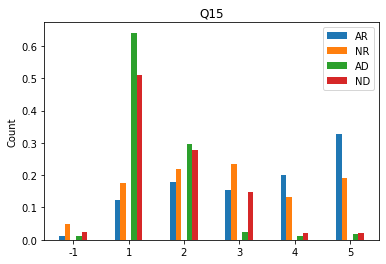

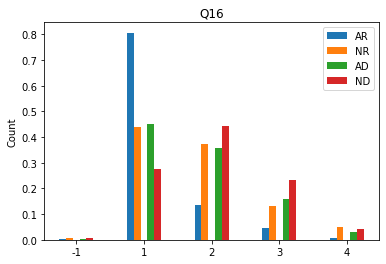

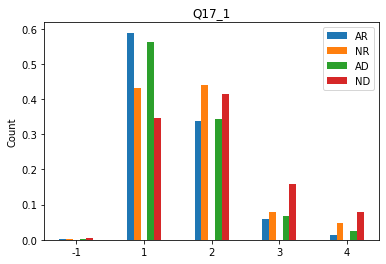

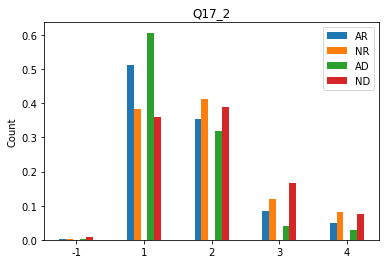

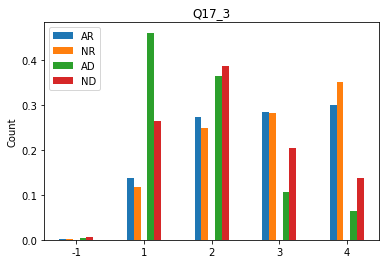

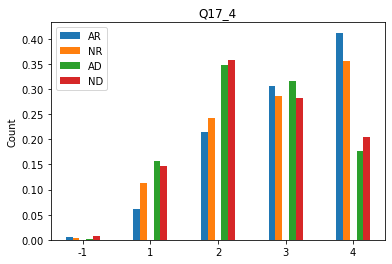

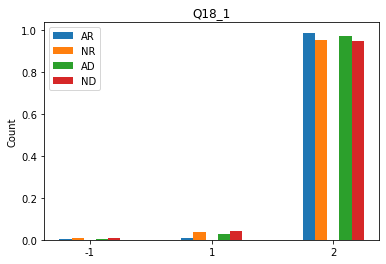

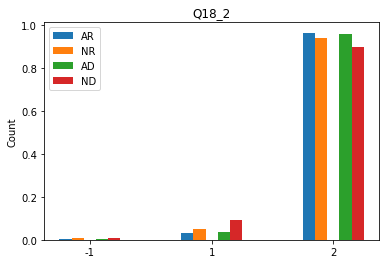

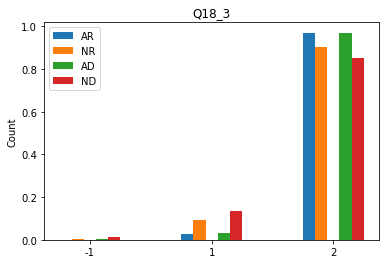

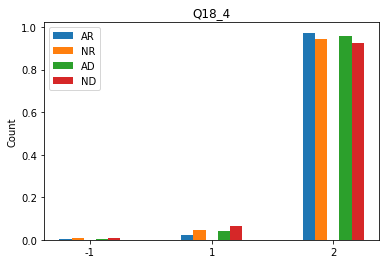

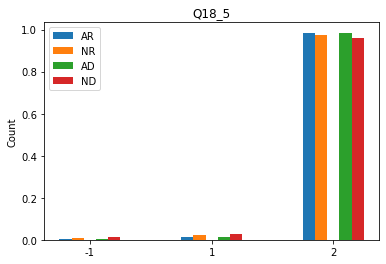

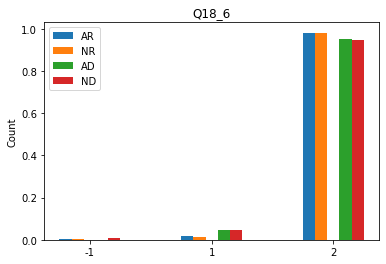

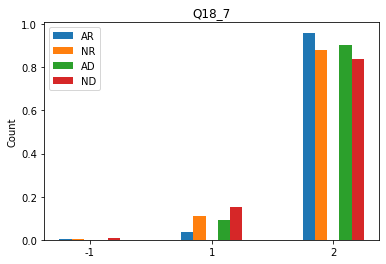

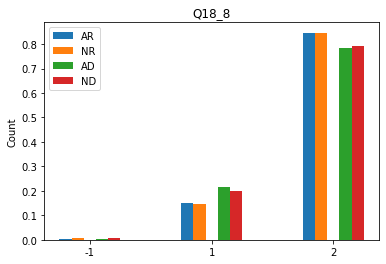

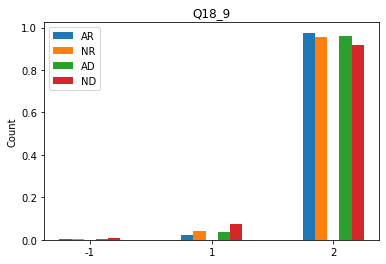

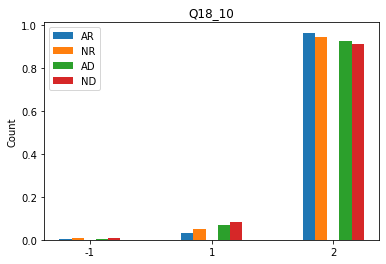

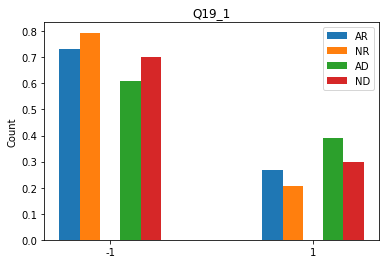

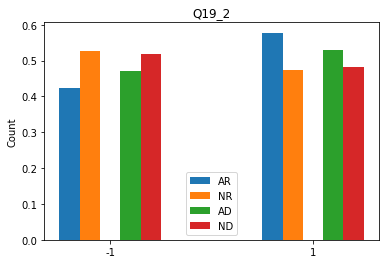

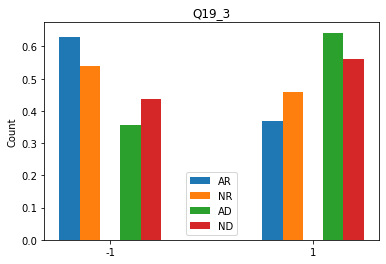

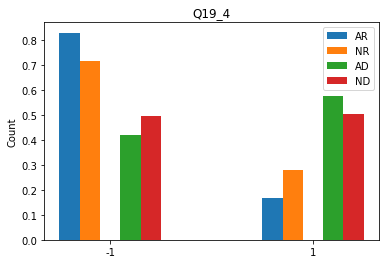

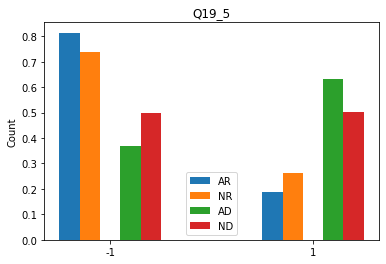

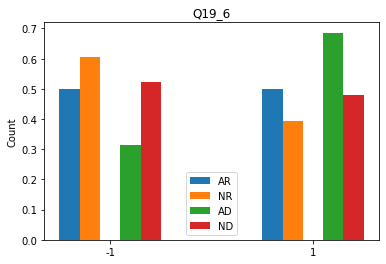

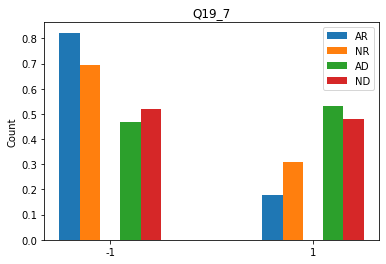

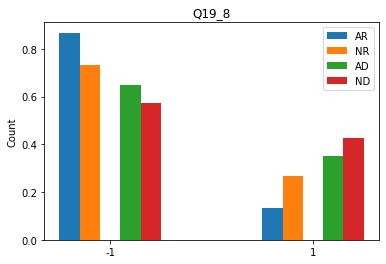

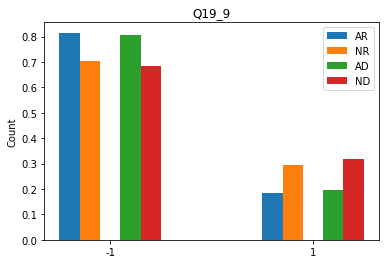

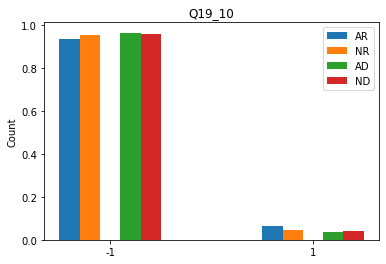

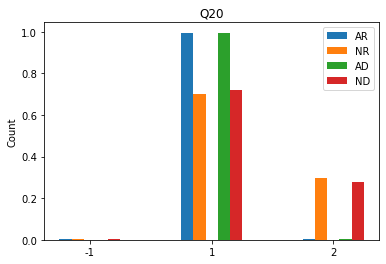

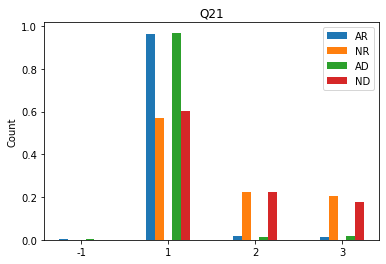

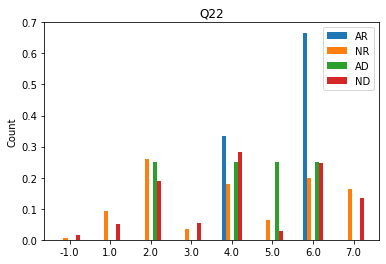

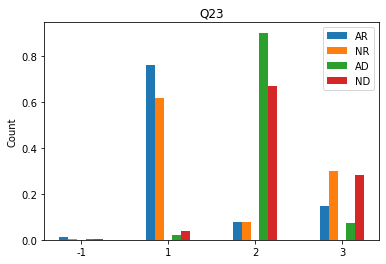

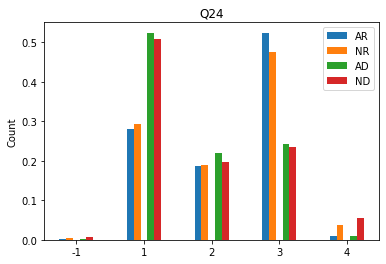

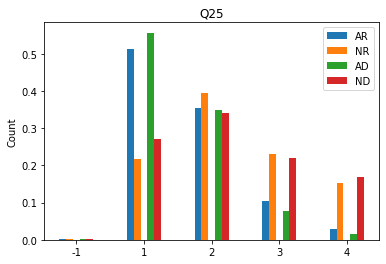

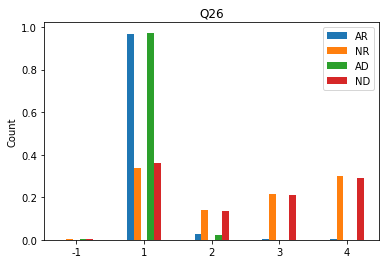

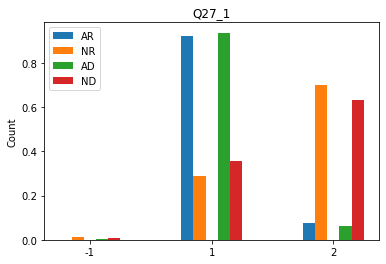

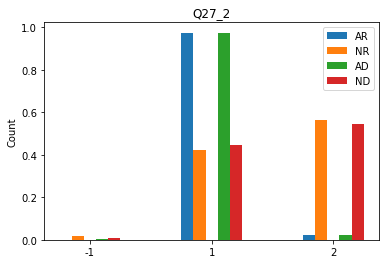

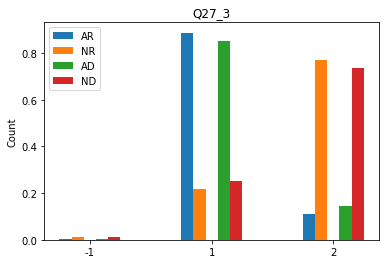

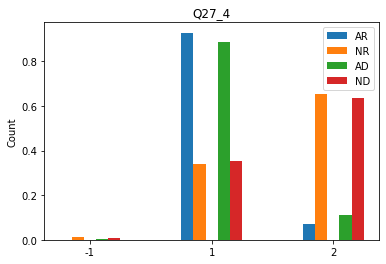

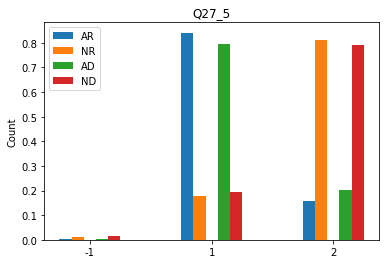

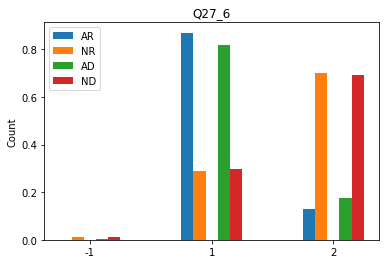

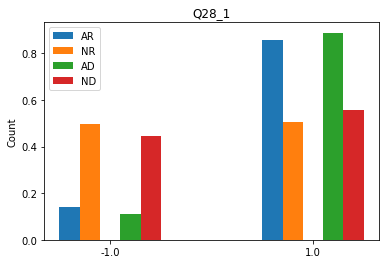

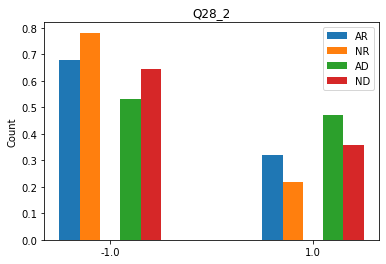

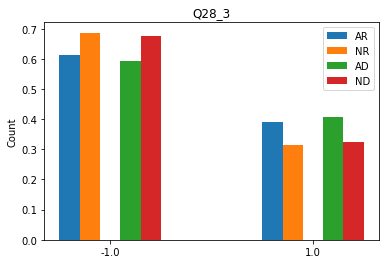

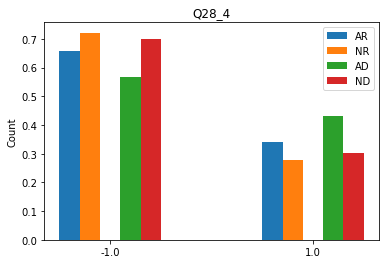

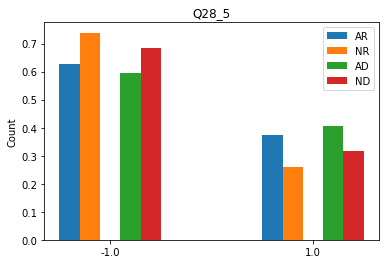

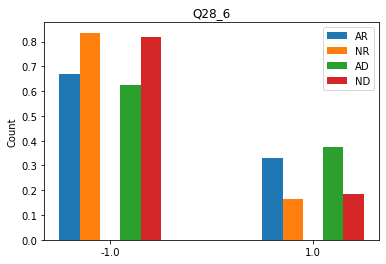

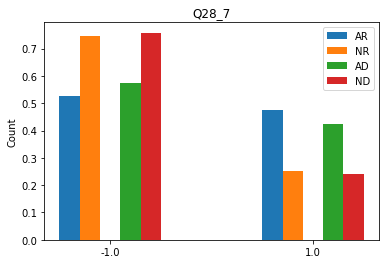

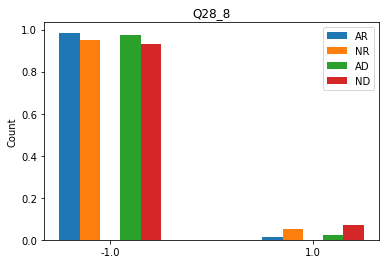

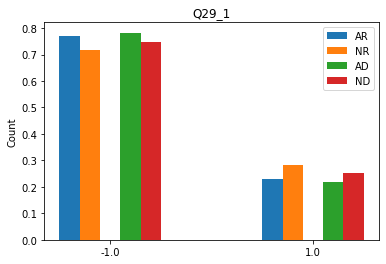

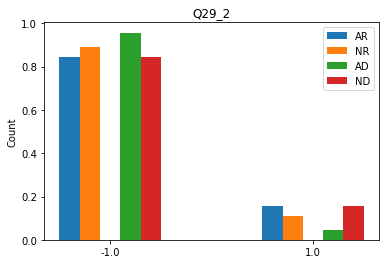

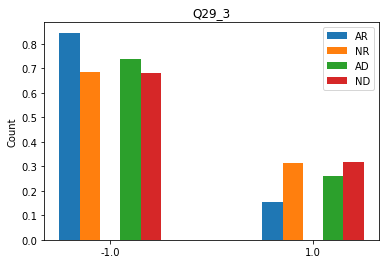

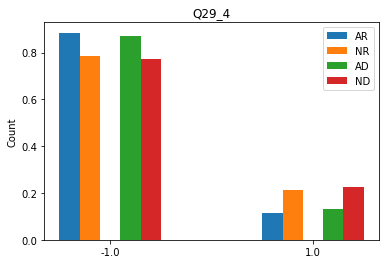

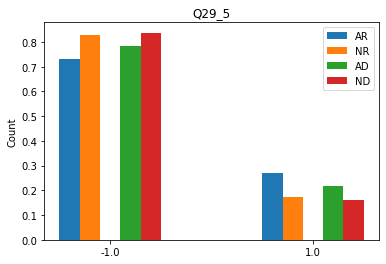

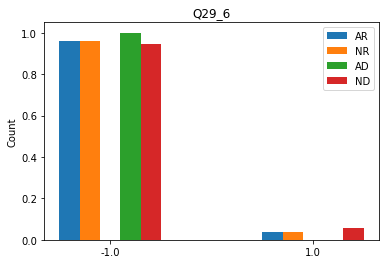

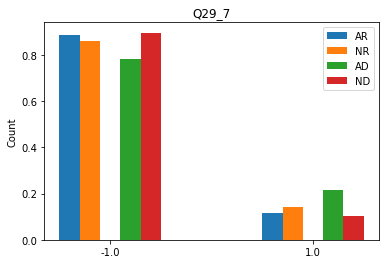

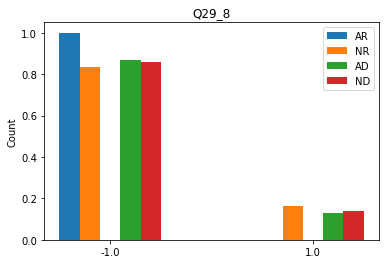

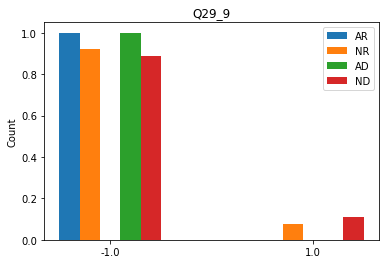

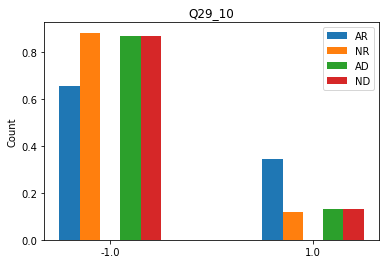

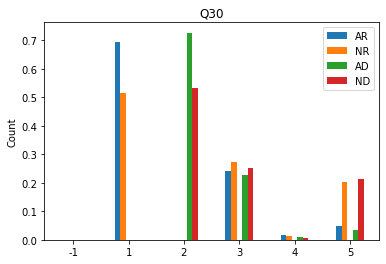

<ipython-input-20-41b7592babf5>:34: RuntimeWarning: invalid value encountered in longlong_scalars
  counts[i] = v/sum_list


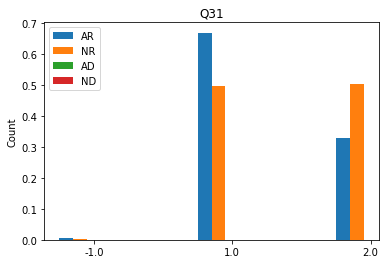

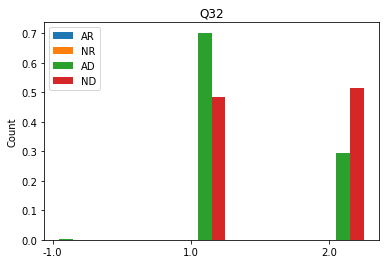

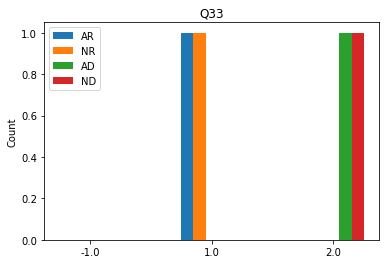

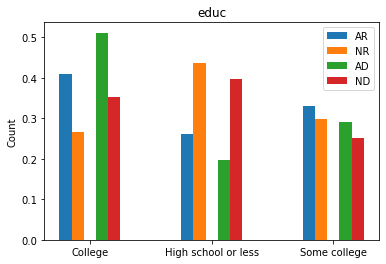

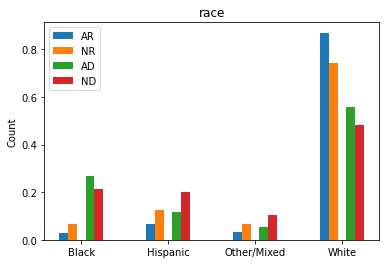

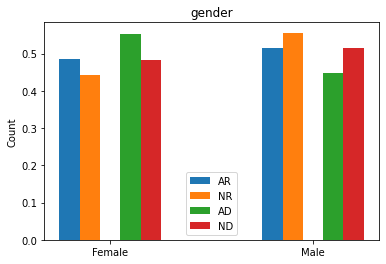

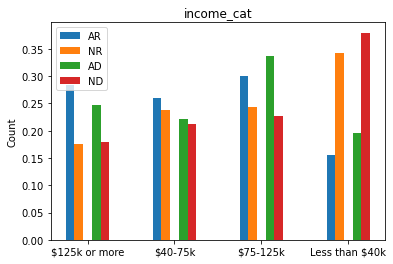

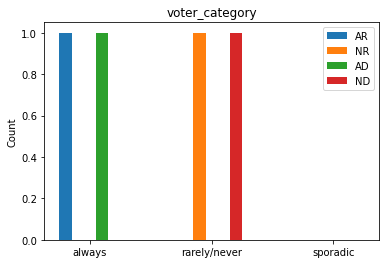

In [22]:
for i, col in enumerate(variables.columns):
    print_figure_by_party(variables, col)

In [23]:
voter_data.head()

,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,2,4,1,4,2,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,2,2,3,1,1,2,1,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,2,2,1,1,2,1,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,3,1,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,-1,1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [24]:
# create csv file of wrangled dataframe
nonvoters_csv_data = voter_data.to_csv('nonvoters_wrangled.csv', index = True) 

In [25]:
data_drops.shape

(5836, 93)

In [26]:
# create csv file of dataframe with column drops.
nonvoters_column_drops = voter_data.to_csv('nonvoters_wrangled_column_drops.csv', index = True) 